In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [5.333, 3]
plt.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans','Lucida Grande', 'Verdana']

In [2]:
input = pd.read_table('amp_input.txt')
output = pd.read_table('amp_output.txt')
power = pd.read_table('amp_psrr.txt')
noise = pd.read_table('amp_noise.txt')

In [3]:
input_impedance = []
output_impedance = []
psrr = []
gain = []
psd = []

for index in range(0,len(input['-V(in)/I(Vsource)'])):
    real = float(input['-V(in)/I(Vsource)'][index].split(',')[0])
    imag = float(input['-V(in)/I(Vsource)'][index].split(',')[1])
    input_impedance.append(real + 1j * imag)
    
for index in range(0,len(input['V(out)'])):
    real = float(input['V(out)'][index].split(',')[0])
    imag = float(input['V(out)'][index].split(',')[1])
    gain.append(real + 1j * imag)

for index in range(0,len(output['-V(out)/I(Vtest)'])):
    real = float(output['-V(out)/I(Vtest)'][index].split(',')[0])
    imag = float(output['-V(out)/I(Vtest)'][index].split(',')[1])
    output_impedance.append(real + 1j * imag)
    
for index in range(0,len(power['V(out)'])):
    real = float(power['V(out)'][index].split(',')[0])
    imag = float(power['V(out)'][index].split(',')[1])
    psrr.append(real + 1j * imag)

for index in range(0,len(noise['V(onoise)'])):
    psd.append(float(noise['V(onoise)'][index]))

In [4]:
amplifier = pd.DataFrame({})
amplifier['Frequency'] = input['Freq.']
amplifier['Input Impedance'] = input_impedance
amplifier['Output Impedance'] = output_impedance
amplifier['Gain'] = gain
amplifier['PSRR'] = psrr
amplifier['Output Referred Noise'] = psd

## Imput Impedance

The buffer has a Hi-Z input, which prevents the any subsequent pedals from loading your guitar.

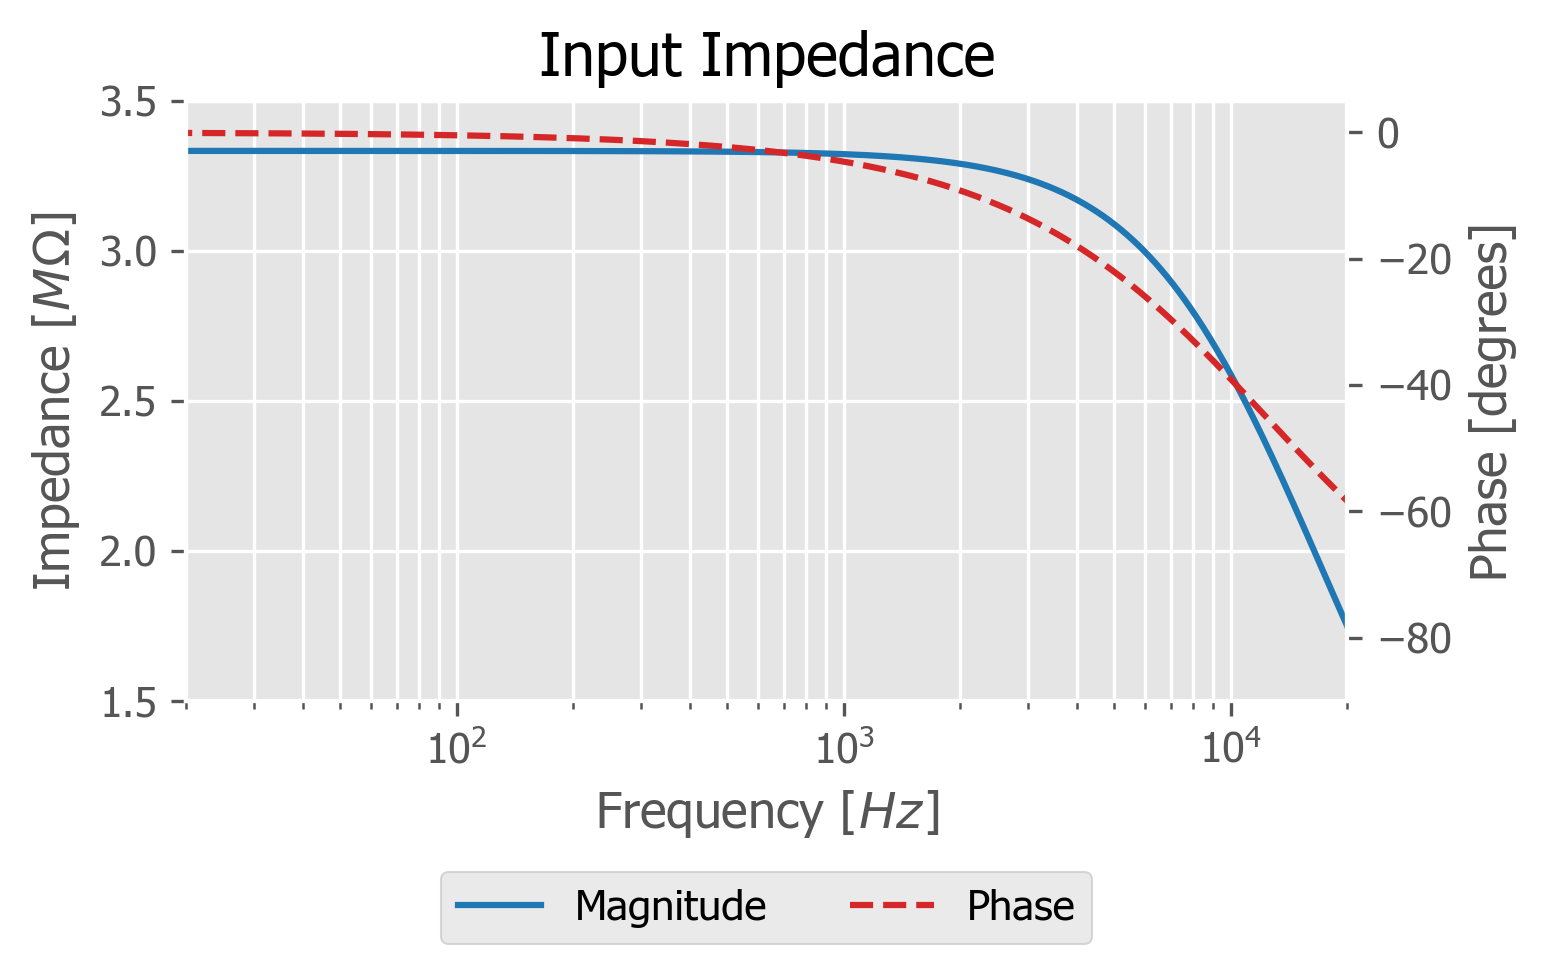

In [16]:
fig, ax1 = plt.subplots()

mag, = ax1.semilogx(amplifier['Frequency'], abs(amplifier['Input Impedance']) / 1e6,
                    color='tab:blue')
ax1.grid(which='minor')

ax1.set_xlabel(r'Frequency $[Hz]$')
ax1.set_ylabel(r'Impedance $[MΩ]$')
ax1.set_xlim((20,20000))
ax1.set_ylim((1.5, 3.5))
ax1.set_title('Input Impedance')

ax2 = ax1.twinx()
phase, = ax2.plot(amplifier['Frequency'], np.angle(amplifier['Input Impedance'],
                                                   deg=True), linestyle='--', color='tab:red')
ax2.set_ylabel(r'Phase [degrees]')
ax2.set_ylim((-90, 5))
ax2.grid()

mag.set_label('Magnitude')
phase.set_label('Phase')
ax2.legend((mag, phase), [mag.get_label(), phase.get_label()],loc='upper center',
           bbox_to_anchor=(0.5, -0.25), ncol=2)


fig.tight_layout()
plt.show()

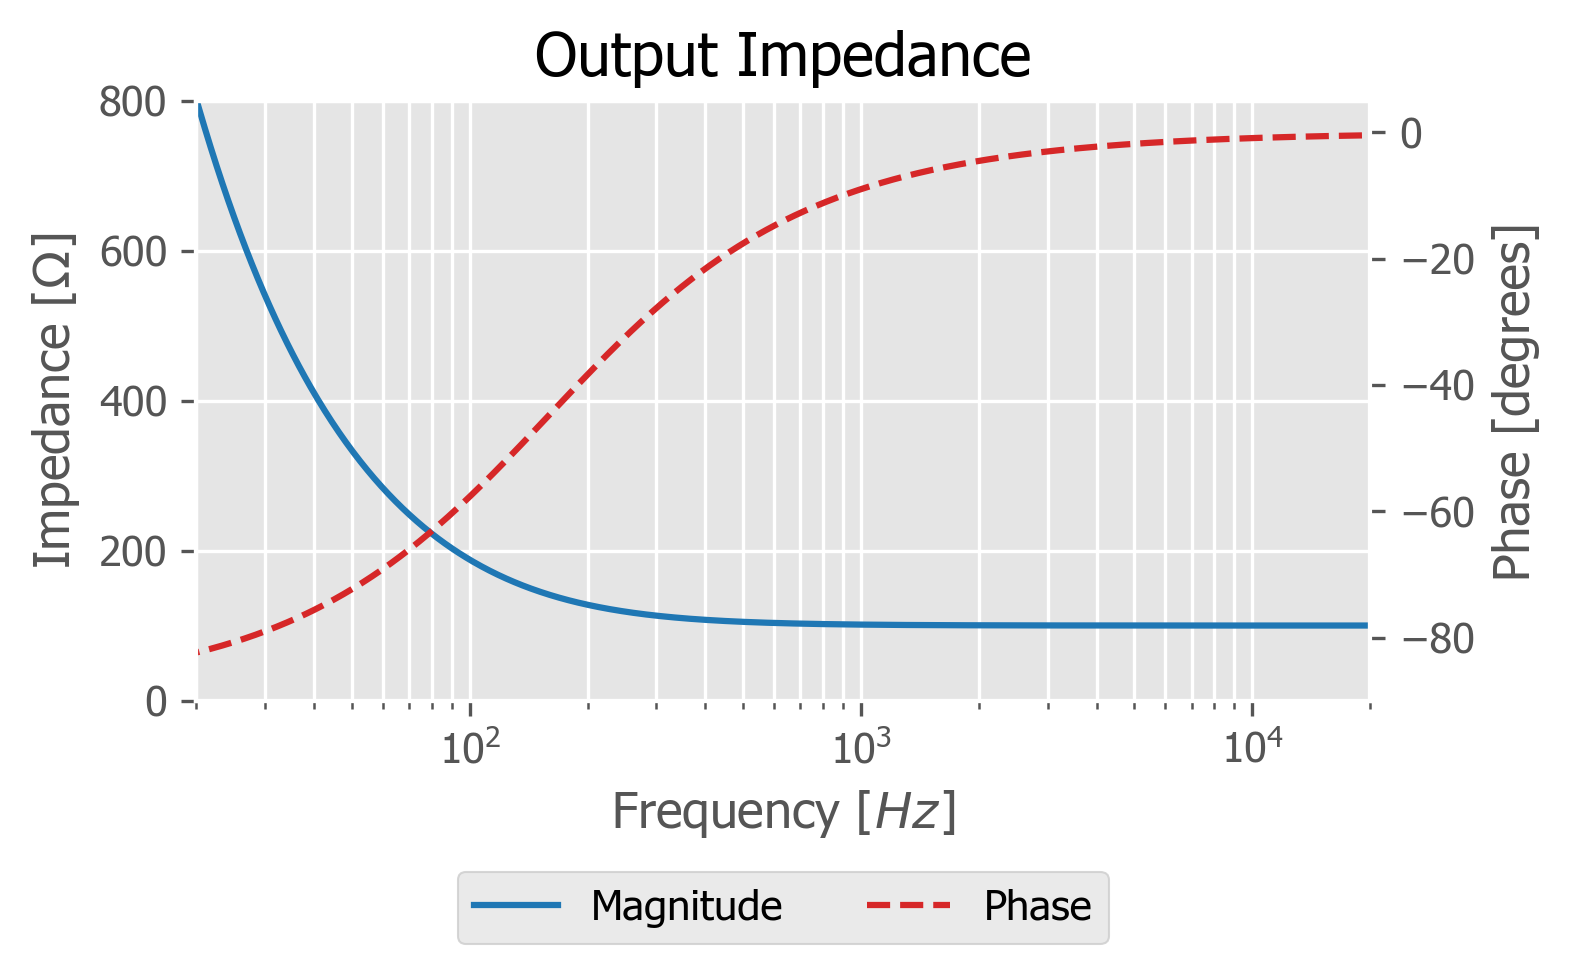

In [14]:
fig, ax1 = plt.subplots()

mag, = ax1.semilogx(amplifier['Frequency'], abs(amplifier['Output Impedance']), color='tab:blue')
ax1.grid(which='minor')
ax1.set_xlabel(r'Frequency $[Hz]$')
ax1.set_ylabel(r'Impedance $[Ω]$')
ax1.set_xlim((20,20000))
ax1.set_ylim((0, 800))
ax1.set_title('Output Impedance')

ax2 = ax1.twinx()
phase, = ax2.plot(amplifier['Frequency'], np.angle(amplifier['Output Impedance'],
                                                   deg=True), linestyle='--', color='tab:red')
ax2.set_ylabel(r'Phase [degrees]')
ax2.set_ylim((-90, 5))
ax2.grid()

mag.set_label('Magnitude')
phase.set_label('Phase')
ax2.legend((mag, phase), [mag.get_label(), phase.get_label()],loc='upper center',
           bbox_to_anchor=(0.5, -0.25), ncol=2)

fig.tight_layout()
plt.show()

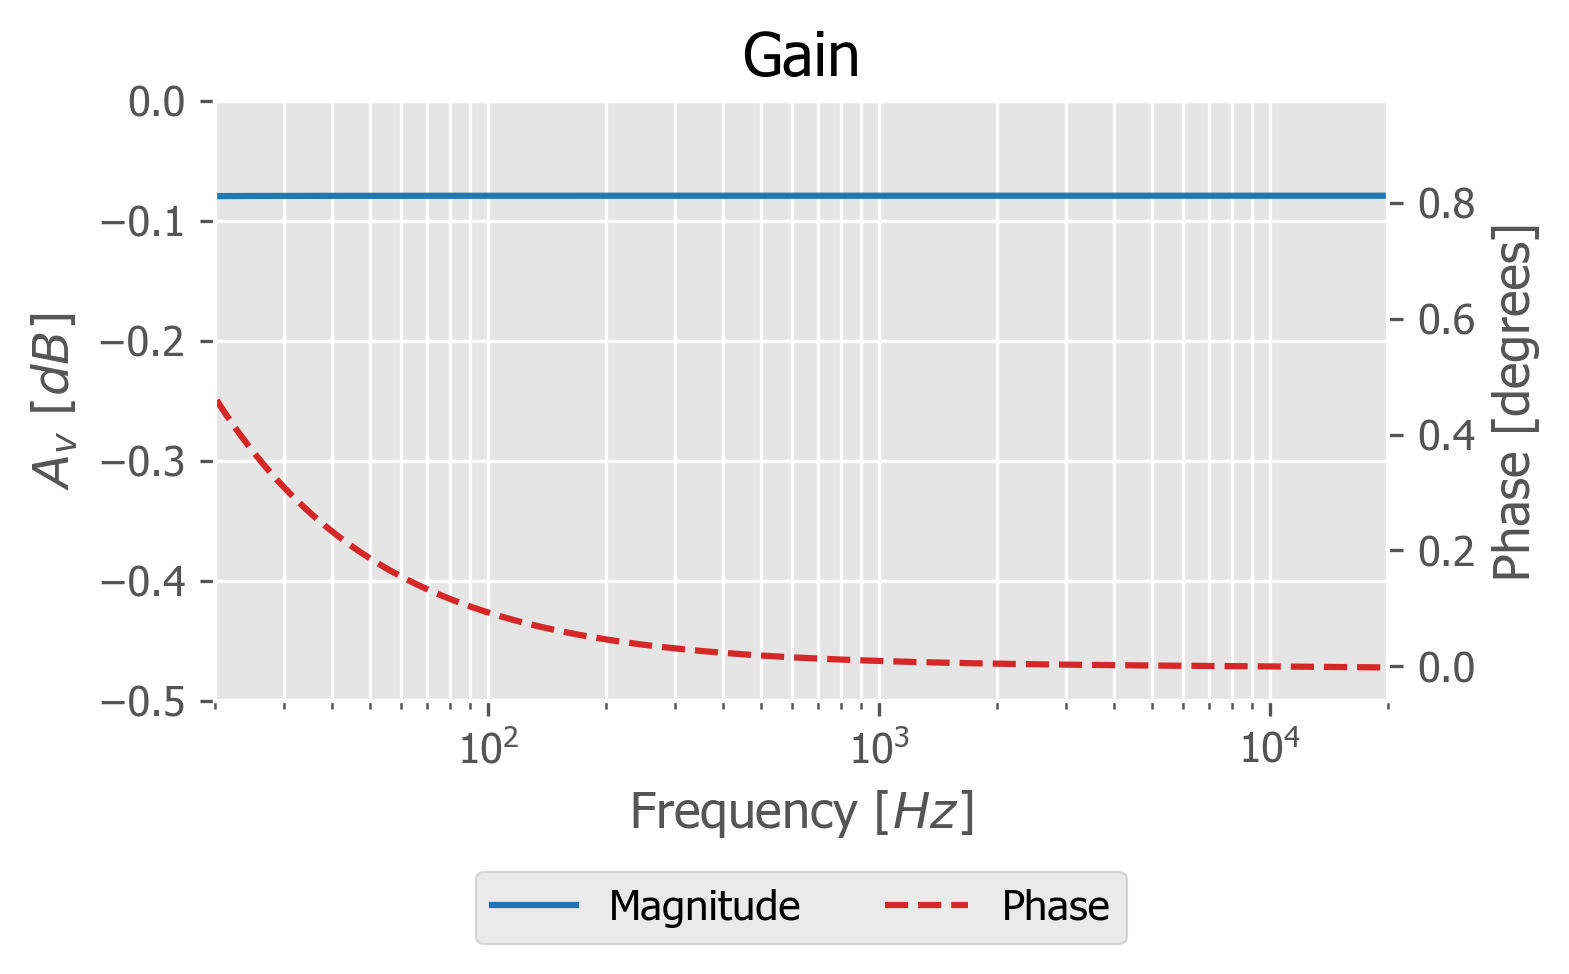

In [7]:
fig, ax1 = plt.subplots()
mag, = ax1.semilogx(amplifier['Frequency'], 20 * np.log10(abs(amplifier['Gain'])),
                    color='tab:blue')
ax1.grid(which='minor')
ax1.set_xlabel(r'Frequency $[Hz]$')
ax1.set_ylabel(r'$A_v$ $[dB]$')

ax1.set_xlim((20,20000))
ax1.set_ylim((-0.5,0))
ax1.set_title('Gain')

ax2 = ax1.twinx()
phase, = ax2.semilogx(amplifier['Frequency'], np.angle(amplifier['Gain'], deg=True),
                      linestyle='--', color='tab:red')
ax2.set_ylabel(r'Phase [degrees]')
ax2.grid()

mag.set_label('Magnitude')
phase.set_label('Phase')
ax2.legend((mag, phase), [mag.get_label(), phase.get_label()],loc='upper center',
           bbox_to_anchor=(0.5, -0.25), ncol=2)

fig.tight_layout()
plt.show()

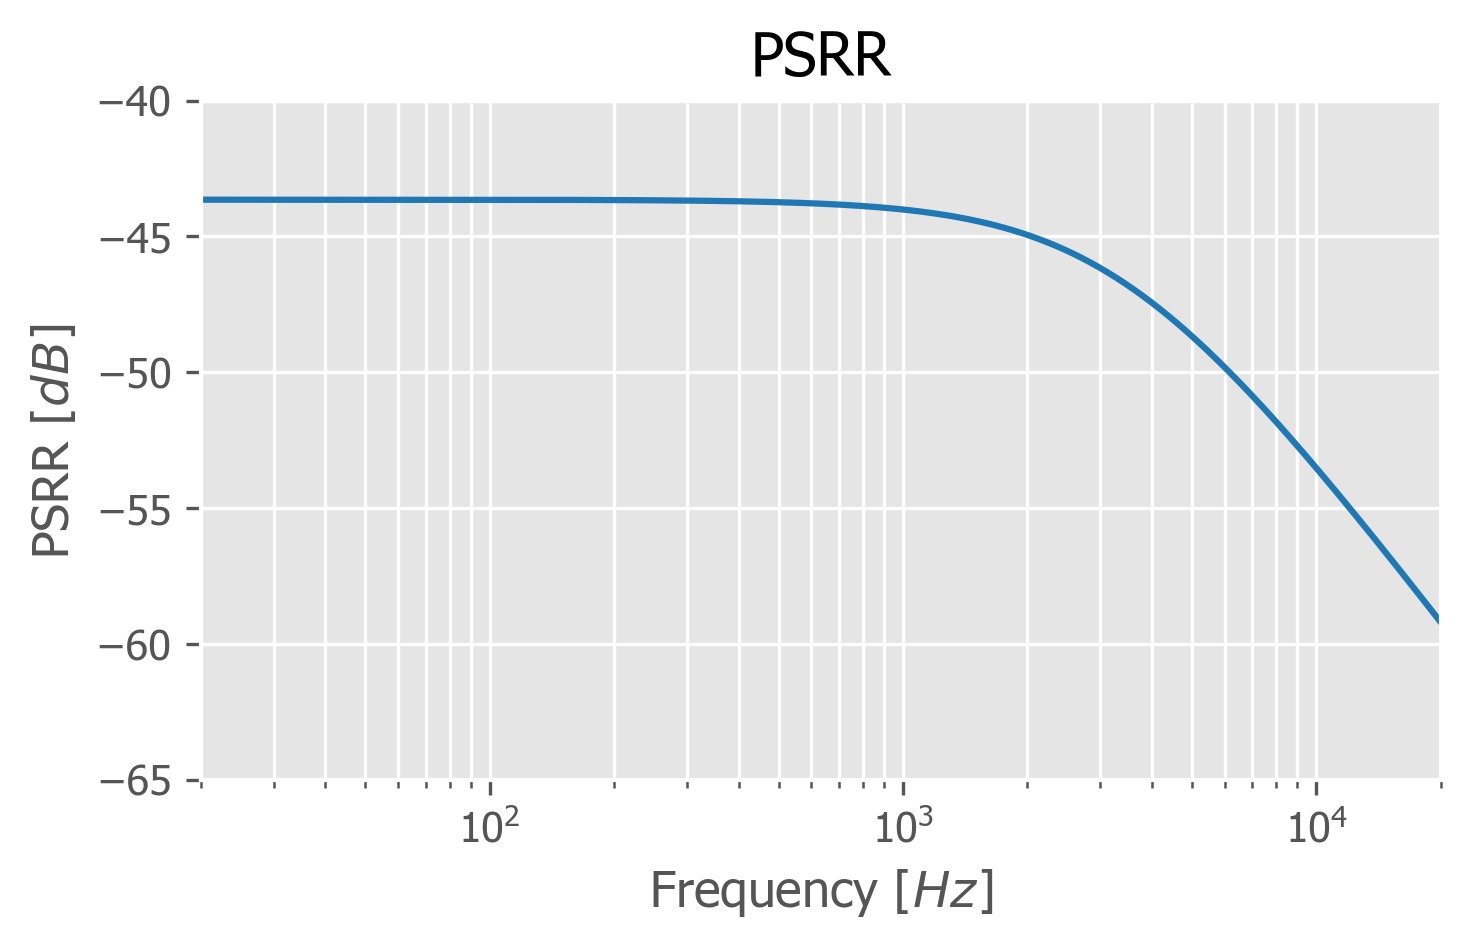

In [8]:
plt.figure()
plt.semilogx(amplifier['Frequency'], 20 * np.log10(abs(amplifier['PSRR'])),
             color='tab:blue')
plt.grid(which='minor')

plt.xlabel(r'Frequency $[Hz]$')
plt.ylabel(r'PSRR $[dB]$')
plt.xlim((20,20000))
plt.ylim((-65,-40))
plt.title('PSRR')

plt.show()

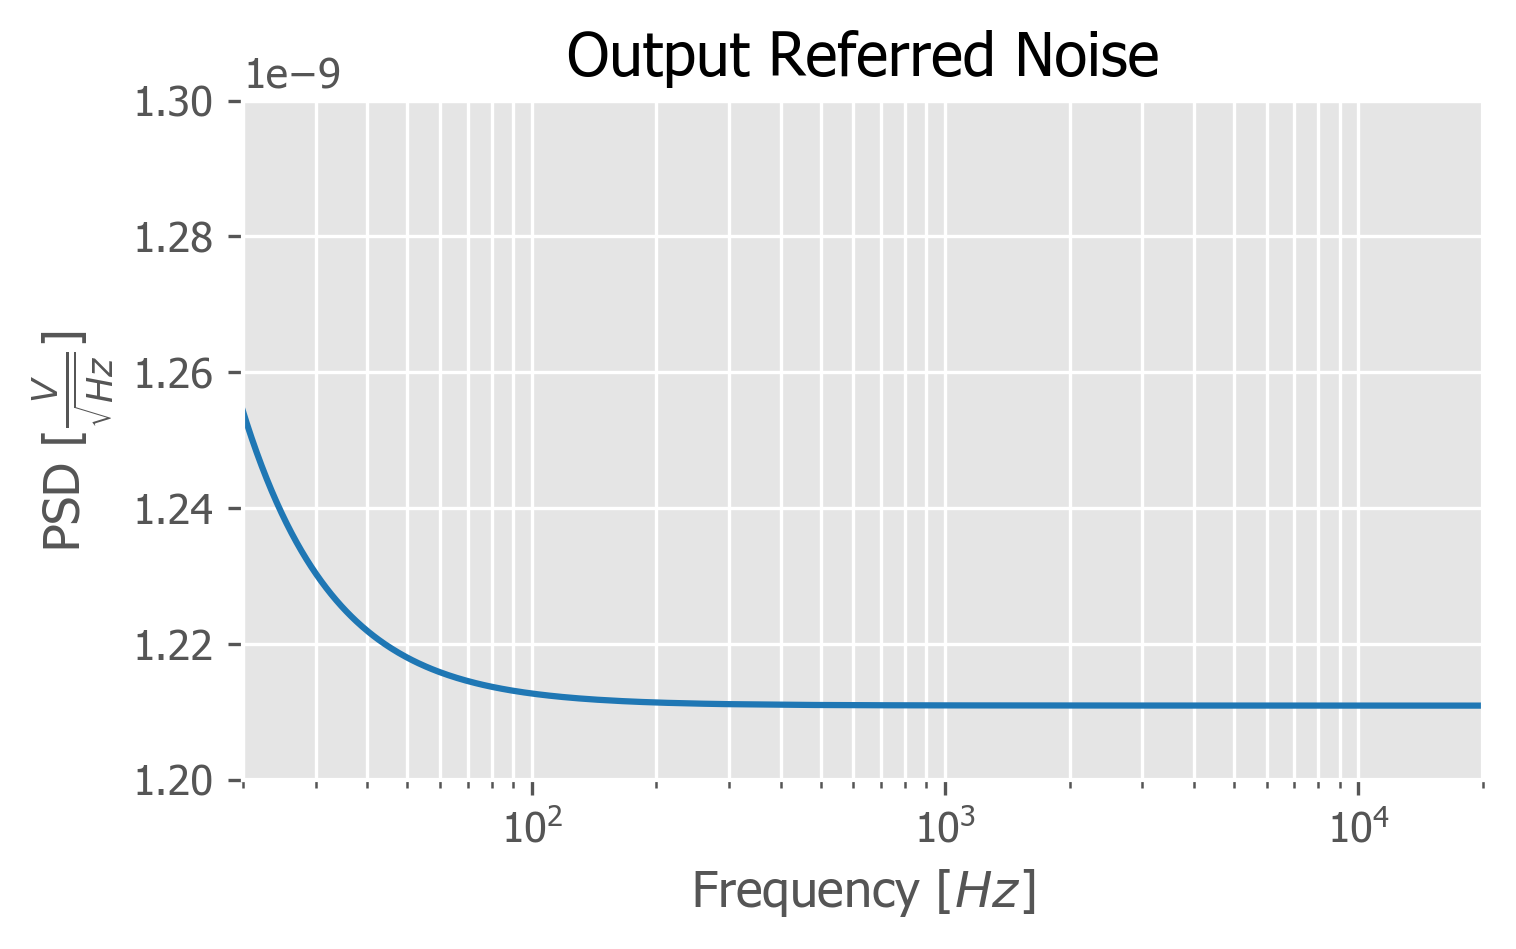

In [9]:
plt.figure()
plt.semilogx(amplifier['Frequency'], amplifier['Output Referred Noise'],
             color='tab:blue')
plt.grid(which='minor')

plt.xlabel(r'Frequency $[Hz]$')
plt.ylabel(r'PSD $[\frac{V}{\sqrt{Hz}}]$')
plt.xlim((20,20000))
plt.ylim((1.2e-9, 1.3e-9))
plt.title('Output Referred Noise')

plt.show()